In [232]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
import pandas as pd
import numpy as np
import seaborn as sns
import ast
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler, RobustScaler, Normalizer, QuantileTransformer, PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from IPython.display import display, HTML
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import warnings
# warnings.filterwarnings('ignore')

In [233]:
df=pd.read_csv('data_10000.csv')
df.head()

,title,author,language,avg_ratings,ratings_count,reviews_count,publisher,publish_year,num_pages,page_format,genres,link
0,The Hunger Games,Suzanne Collins,English,4.33,7971601,196977,Scholastic Press,2008.0,374.0,Hardcover,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",https://www.goodreads.com/book/show/2767052-th...
1,Harry Potter and the Order of the Phoenix,J.K. Rowling,English,4.50,3150618,57202,Scholastic Inc.,2004.0,912.0,Paperback,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",https://www.goodreads.com/book/show/2.Harry_Po...
2,Pride and Prejudice,Jane Austen,English,4.28,3948185,100606,Modern Library,2000.0,279.0,Paperback,"['Classics', 'Fiction', 'Romance', 'Historical...",https://www.goodreads.com/book/show/1885.Pride...
3,To Kill a Mockingbird,Harper Lee,English,4.27,5696477,110338,Harper Perennial Modern Classics,2006.0,323.0,Paperback,"['Classics', 'Fiction', 'Historical Fiction', ...",https://www.goodreads.com/book/show/2657.To_Ki...
4,The Book Thief,Markus Zusak,English,4.39,2367106,136148,Alfred A. Knopf,2006.0,552.0,Hardcover,"['Historical Fiction', 'Fiction', 'Young Adult...",https://www.goodreads.com/book/show/19063.The_...


In [234]:
def string_to_num(X_train, X_val, X_test, col):
    # Khởi tạo Label Encoder
    le = LabelEncoder()
    
    for i in X_test[col].unique():
        if i not in X_train[col].unique():
            X_test[col].replace(i, 'Unknown', inplace=True)
    for i in X_val[col].unique():
        if i not in X_train[col].unique():
            X_val[col].replace(i, 'Unknown', inplace=True)

    data = np.append(np.array(X_train[col].copy()), 'Unknown')
    le.fit(data)
    X_train[col] = le.transform(X_train[col])
    X_val[col] = le.transform(X_val[col])
    X_test[col] = le.transform(X_test[col])

    return X_train, X_val, X_test

In [235]:
def extractingg(df):
    # Khởi tạo Label Encoder

    df.drop(['link'], axis=1, inplace=True)

    df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x))
    df['genres'] = df['genres'].apply(lambda x: sorted(x))
    df['genres'] = df['genres'].apply(lambda x: ','.join(x))

    # df['ratings_count'] = df['ratings_count'].apply(lambda x: int(x.replace(',', '')))
    # df['reviews_count'] = df['reviews_count'].apply(lambda x: int(x.replace(',', '')))
    # df['num_pages'] = df['num_pages'].astype(float)
    # df['publish_year'] = df['publish_year'].astype(float)
    
    return df

In [236]:
df = extractingg(df)

In [237]:
df.head()

,title,author,language,avg_ratings,ratings_count,reviews_count,publisher,publish_year,num_pages,page_format,genres
0,The Hunger Games,Suzanne Collins,English,4.33,7971601,196977,Scholastic Press,2008.0,374.0,Hardcover,"Adventure,Audiobook,Dystopia,Fantasy,Fiction,P..."
1,Harry Potter and the Order of the Phoenix,J.K. Rowling,English,4.50,3150618,57202,Scholastic Inc.,2004.0,912.0,Paperback,"Adventure,Audiobook,Childrens,Classics,Fantasy..."
2,Pride and Prejudice,Jane Austen,English,4.28,3948185,100606,Modern Library,2000.0,279.0,Paperback,"Adult,Audiobook,Classics,Fiction,Historical,Hi..."
3,To Kill a Mockingbird,Harper Lee,English,4.27,5696477,110338,Harper Perennial Modern Classics,2006.0,323.0,Paperback,"Classics,Fiction,High School,Historical,Histor..."
4,The Book Thief,Markus Zusak,English,4.39,2367106,136148,Alfred A. Knopf,2006.0,552.0,Hardcover,"Books About Books,Classics,Fiction,Historical,..."


In [238]:
def fillMissingData(data_train, data_val, data_test):
    eod_columns = ['publish_year', 'num_pages', 'page_format', 'publisher_count']
    eod_values = [data_train[col].mean() + 3*data_train[col].std() for col in eod_columns]
    for col, val in zip(eod_columns, eod_values):
        data_train[col].fillna(val, inplace=True)
        data_val[col].fillna(val, inplace=True)
        data_test[col].fillna(val, inplace=True)
    return data_train, data_val, data_test

In [239]:
def plotDistribution(data, columns):
    fig, axes = plt.subplots(1, len(columns), figsize=(20, 5))
    axes = axes.flatten()
    for col, ax in zip(columns, axes):
        ax.hist(data[col], bins=50)
        ax.set_title(col)
    plt.show()

def plotScatter(data, columns, target):
    fig, axes = plt.subplots(1, len(columns), figsize=(20, 5))
    for col, ax in zip(columns, axes):
        ax.scatter(data[col], data[target])
        ax.set_title(col)
    plt.show()

def plotBar(data, columns):
    fig, axes = plt.subplots(1, len(columns), figsize=(20, 5))
    for col, ax in zip(columns, axes):
        ax.bar(data[col].value_counts().index, data[col].value_counts())
        ax.set_title(col)
    plt.show()

def plotHeatmap(data, columns):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.matshow(data[columns].corr())
    plt.xticks(range(len(columns)), columns, rotation=90)
    plt.yticks(range(len(columns)), columns)
    plt.show()

def plotBox(data, columns):
    fig, axes = plt.subplots(1, len(columns), figsize=(20, 5))
    for col, ax in zip(columns, axes):
        ax.boxplot(data[col])
        ax.set_title(col)
    plt.show()

In [240]:
def printDescription(data, columns):
    for col in columns:
        print(data[col].describe())

In [241]:
skewedDists = ['ratings_count', 'reviews_count', 'publish_year', 'num_pages', 'Fiction', 'Classics', 'Adventure',
       'Mystery', 'Historical Fiction', 'Literature', 'Paranormal', 'Historical', 'Science Fiction', 'Thriller', 
       'Magic', 'Nonfiction', 'Childrens', 'num_occ', 'publisher_count', 'rating_review_ratio', 'books_by_author']
isUpper_bridge = [True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
skewedDists = {col: isUpper_bridge for col, isUpper_bridge in zip(skewedDists, isUpper_bridge)}
gaussionDists = []
isUpper_boundary = []
gaussionDists = {col: isUpper_boundary for col, isUpper_boundary in zip(gaussionDists, isUpper_boundary)}

In [242]:
def outliers_handle(data, variable, isShow=False):
    upper_boundary=data[variable].mean() + 3 * data[variable].std()
    lower_boundary=data[variable].mean() - 3 * data[variable].std()
    if isShow:
        print(f"upper_boundary: {upper_boundary}")
        print(f"lower_boundary: {lower_boundary}")
        print(f"mean: {data[variable].mean()}")
    return lower_boundary, upper_boundary

def outliers_handle_skewed(data, variable, isShow=False):
    IQR=data[variable].quantile(0.75) - data[variable].quantile(0.25)
    lower_bridge=data[variable].quantile(0.25) - (IQR*3)
    upper_bridge=data[variable].quantile(0.75) + (IQR*3)
    if isShow:
        print(f"lower_bridge: {lower_bridge}")
        print(f"upper_bridge: {upper_bridge}")
    return lower_bridge, upper_bridge

In [243]:
minMaxScaler = MinMaxScaler()
maxAbsScaler = MaxAbsScaler()
standardScaler = StandardScaler()
robustScaler = RobustScaler()
normalizer = Normalizer()
quantileTransformer = QuantileTransformer()
powerTransformer = PowerTransformer()
scalerArr = [minMaxScaler, maxAbsScaler, standardScaler, robustScaler, normalizer, quantileTransformer, powerTransformer]

In [244]:
def scaleData(data_train, data_val, data_test, scaler):
    scaler.fit(data_train)
    data_train = pd.DataFrame(scaler.transform(data_train.copy()), columns=data_train.columns)
    data_val = pd.DataFrame(scaler.transform(data_val.copy()), columns=data_val.columns)
    data_test = pd.DataFrame(scaler.transform(data_test.copy()), columns=data_test.columns)
    return data_train, data_val, data_test

In [245]:
def handleOutlier(data_train, data_val, data_test):
    for col in skewedDists:
        lower_bridge, upper_bridge = outliers_handle_skewed(data_train, col)
        if skewedDists[col]:
            data_train.loc[data_train[col]>=upper_bridge,col]=upper_bridge
            data_val.loc[data_val[col]>=upper_bridge,col]=upper_bridge
            data_test.loc[data_test[col]>=upper_bridge,col]=upper_bridge
        else:
            data_train.loc[data_train[col]<=lower_bridge,col]=lower_bridge
            data_val.loc[data_val[col]<=lower_bridge,col]=lower_bridge
            data_test.loc[data_test[col]<=lower_bridge,col]=lower_bridge
        
    for col in gaussionDists:
        lower_boundary, upper_boundary = outliers_handle(data_train, col)
        if gaussionDists[col]:
            data_train.loc[data_train[col]>=upper_boundary,col]=upper_boundary
            data_val.loc[data_val[col]>=upper_boundary,col]=upper_boundary
            data_test.loc[data_test[col]>=upper_boundary,col]=upper_boundary
        else:
            data_train.loc[data_train[col]<=lower_boundary,col]=lower_boundary
            data_val.loc[data_val[col]<=lower_boundary,col]=lower_boundary
            data_test.loc[data_test[col]<=lower_boundary,col]=lower_boundary
    return data_train, data_val, data_test

In [246]:
def featureSelection1(X, y):
    estimator = SVR(kernel="linear")
    selector = RFE(estimator, n_features_to_select=16, step=1)
    selector = selector.fit(X, y)
    ix = selector.get_support() 
    data = pd.DataFrame(selector.transform(X), columns = X.columns.values[ix])
    print(data.columns.values)
    return data.columns.values

In [247]:
def selectFeatures(X_train, y_train, X_val, X_test):
    featureArray = featureSelection1(X_train, y_train)
    X_train = X_train[featureArray]
    X_val = X_val[featureArray]
    X_test = X_test[featureArray]
    return X_train, X_val, X_test

In [248]:
def accuracyScore(y_test, y_pred, isShow = True):
    MAE = mean_absolute_error(y_test, y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    r2score = r2_score(y_test, y_pred)
    # adjusted_r2 = 1 - (1-r2score)*(len(y)-1)/(len(y)-X.shape[1]-1)
    # MAPE = mean_absolute_percentage_error(y_test, y_pred)
    if isShow:
        print(
            f'MAE: \n{MAE}\n'
            f'RMSE: \n{RMSE}\n'
            f'R2 score: \n{r2score}\n'
            # f'MAPE: \n{MAPE}\n'
        )
        plt.scatter(y_test, y_pred, color='red')
        plt.xlabel('True values')
        plt.xlabel('Predicted values')
        plt.axis('equal')
        plt.axis('square')
        plt.show()
    return MAE, RMSE, r2score

In [249]:
def trainModel(X_train, y_train, X_val, y_val):
    result = []
    label = ['Random Forest', 'SVR']
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    MAE, RMSE, r2score = accuracyScore(y_val, y_pred, False)
    result.append([MAE, RMSE, r2score])
    
    model = SVR()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    MAE, RMSE, r2score = accuracyScore(y_val, y_pred, False)
    result.append([MAE, RMSE, r2score])
    result = pd.DataFrame(result, columns=['MAE', 'RMSE', 'r2score'], index=label)
    return result    

In [250]:
# check for doublications
print(f"Number of duplicated rows: {df.duplicated().any().sum()}")
if df.duplicated().any().sum() > 0:
    df.drop_duplicates(inplace=True)

Number of duplicated rows: 1


In [251]:
# check for missing values
print(f"Number of missing values: \n{df.isnull().sum()}")

Number of missing values: 
title              0
author             0
language         211
avg_ratings        0
ratings_count      0
reviews_count      0
publisher        372
publish_year      61
num_pages        124
page_format       44
genres             0
dtype: int64


In [252]:
df.head()

,title,author,language,avg_ratings,ratings_count,reviews_count,publisher,publish_year,num_pages,page_format,genres
0,The Hunger Games,Suzanne Collins,English,4.33,7971601,196977,Scholastic Press,2008.0,374.0,Hardcover,"Adventure,Audiobook,Dystopia,Fantasy,Fiction,P..."
1,Harry Potter and the Order of the Phoenix,J.K. Rowling,English,4.50,3150618,57202,Scholastic Inc.,2004.0,912.0,Paperback,"Adventure,Audiobook,Childrens,Classics,Fantasy..."
2,Pride and Prejudice,Jane Austen,English,4.28,3948185,100606,Modern Library,2000.0,279.0,Paperback,"Adult,Audiobook,Classics,Fiction,Historical,Hi..."
3,To Kill a Mockingbird,Harper Lee,English,4.27,5696477,110338,Harper Perennial Modern Classics,2006.0,323.0,Paperback,"Classics,Fiction,High School,Historical,Histor..."
4,The Book Thief,Markus Zusak,English,4.39,2367106,136148,Alfred A. Knopf,2006.0,552.0,Hardcover,"Books About Books,Classics,Fiction,Historical,..."


In [253]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9998 entries, 0 to 9998
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          9998 non-null   object 
 1   author         9998 non-null   object 
 2   language       9787 non-null   object 
 3   avg_ratings    9998 non-null   float64
 4   ratings_count  9998 non-null   int64  
 5   reviews_count  9998 non-null   int64  
 6   publisher      9626 non-null   object 
 7   publish_year   9937 non-null   float64
 8   num_pages      9874 non-null   float64
 9   page_format    9954 non-null   object 
 10  genres         9998 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 937.3+ KB
None


In [254]:
total_genres = []
for genres in df['genres']:
    for genre in genres.split(','):
        total_genres.append(genre)
total_genres = set(total_genres)
print(f"Total genres: {len(total_genres)}")
# print(f"Genres: {total_genres}")

Total genres: 679


In [255]:
all_genres = []
for genres in df['genres']:
    for genre in genres.split(','):
        all_genres.append(genre)

# Đếm số lượng mỗi thể loại
genre_counts = pd.Series(all_genres).value_counts().to_dict()

top_20_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)[:20]
print(f"Top 20 genres: {top_20_genres}")


Top 20 genres: [('Fiction', 8167), ('Fantasy', 4247), ('Romance', 3600), ('Young Adult', 3411), ('Audiobook', 3017), ('Contemporary', 2569), ('Classics', 2393), ('Novels', 2363), ('Adult', 2328), ('Adventure', 1940), ('Mystery', 1887), ('Historical Fiction', 1886), ('Literature', 1858), ('Paranormal', 1513), ('Historical', 1460), ('Science Fiction', 1362), ('Thriller', 1295), ('Magic', 1289), ('Nonfiction', 1234), ('Childrens', 1092)]


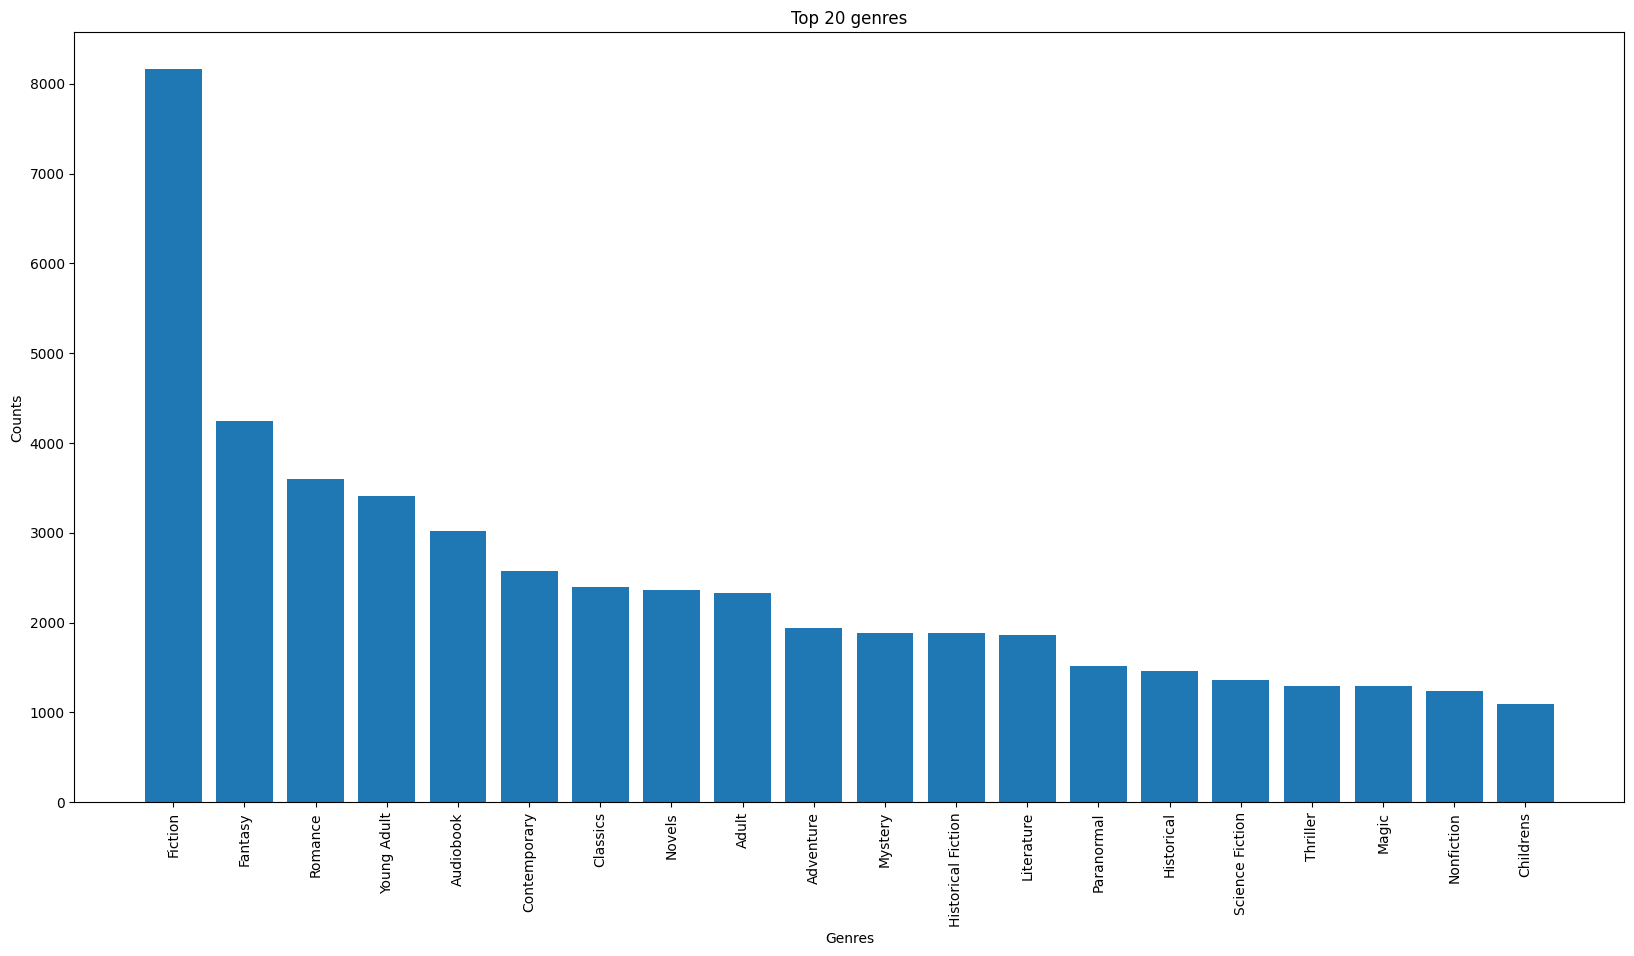

In [256]:
# Visualize top 20 genres
plt.figure(figsize=(20, 10))
plt.bar(range(len(top_20_genres)), [val[1] for val in top_20_genres], align='center')
plt.xticks(range(len(top_20_genres)), [val[0] for val in top_20_genres])
plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.ylabel('Counts')
plt.title('Top 20 genres')
plt.show()

In [257]:
top_20_genres_col = [genre[0] for genre in top_20_genres]
# print(f"Top 20 genres columns: {top_20_genres_col}")

# Tạo cột cho mỗi thể loại
for genre in top_20_genres_col:
    df[genre] = df['genres'].apply(lambda x: 1 if genre in x else 0)


pd.set_option('display.max_columns', None)

df.head()

,title,author,language,avg_ratings,ratings_count,reviews_count,publisher,publish_year,num_pages,page_format,genres,Fiction,Fantasy,Romance,Young Adult,Audiobook,Contemporary,Classics,Novels,Adult,Adventure,Mystery,Historical Fiction,Literature,Paranormal,Historical,Science Fiction,Thriller,Magic,Nonfiction,Childrens
0,The Hunger Games,Suzanne Collins,English,4.33,7971601,196977,Scholastic Press,2008.0,374.0,Hardcover,"Adventure,Audiobook,Dystopia,Fantasy,Fiction,P...",1,1,1,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0
1,Harry Potter and the Order of the Phoenix,J.K. Rowling,English,4.50,3150618,57202,Scholastic Inc.,2004.0,912.0,Paperback,"Adventure,Audiobook,Childrens,Classics,Fantasy...",1,1,0,1,1,0,1,0,1,1,0,0,0,0,0,1,0,1,0,1
2,Pride and Prejudice,Jane Austen,English,4.28,3948185,100606,Modern Library,2000.0,279.0,Paperback,"Adult,Audiobook,Classics,Fiction,Historical,Hi...",1,0,1,0,1,0,1,1,1,0,0,1,1,0,1,0,0,0,0,0
3,To Kill a Mockingbird,Harper Lee,English,4.27,5696477,110338,Harper Perennial Modern Classics,2006.0,323.0,Paperback,"Classics,Fiction,High School,Historical,Histor...",1,0,0,1,0,0,1,1,1,0,0,1,1,0,1,0,0,0,0,0
4,The Book Thief,Markus Zusak,English,4.39,2367106,136148,Alfred A. Knopf,2006.0,552.0,Hardcover,"Books About Books,Classics,Fiction,Historical,...",1,0,0,1,0,0,1,1,1,0,0,1,0,0,1,0,0,0,0,0


In [258]:
df['num_occ'] = df.groupby('title')['title'].transform('count')
df.loc[df['reviews_count'] == 0, 'reviews_count'] = 1
# df['title_length'] = df['title'].apply(lambda x: len(x))
df['publisher_count'] = df.groupby('publisher')['publisher'].transform('count')
df['rating_review_ratio'] = df['ratings_count'] / df['reviews_count']
df['books_by_author'] = df.groupby('author')['author'].transform('count')
df['is_famous_author'] = df['books_by_author'].apply(lambda x: 1 if x > 10 else 0)

drops = ['title', 'genres', 'author', 'publisher', 'language']
# df.drop(['title'], axis=1, inplace=True)
for col in drops:
    df.drop([col], axis=1, inplace=True)
df.head()

,avg_ratings,ratings_count,reviews_count,publish_year,num_pages,page_format,Fiction,Fantasy,Romance,Young Adult,Audiobook,Contemporary,Classics,Novels,Adult,Adventure,Mystery,Historical Fiction,Literature,Paranormal,Historical,Science Fiction,Thriller,Magic,Nonfiction,Childrens,num_occ,publisher_count,rating_review_ratio,books_by_author,is_famous_author
0,4.33,7971601,196977,2008.0,374.0,Hardcover,1,1,1,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,59.0,40.469705,11,1
1,4.50,3150618,57202,2004.0,912.0,Paperback,1,1,0,1,1,0,1,0,1,1,0,0,0,0,0,1,0,1,0,1,2,24.0,55.078808,19,1
2,4.28,3948185,100606,2000.0,279.0,Paperback,1,0,1,0,1,0,1,1,1,0,0,1,1,0,1,0,0,0,0,0,1,39.0,39.244031,7,0
3,4.27,5696477,110338,2006.0,323.0,Paperback,1,0,0,1,0,0,1,1,1,0,0,1,1,0,1,0,0,0,0,0,2,1.0,51.627517,3,0
4,4.39,2367106,136148,2006.0,552.0,Hardcover,1,0,0,1,0,0,1,1,1,0,0,1,0,0,1,0,0,0,0,0,1,26.0,17.386271,3,0


In [259]:
# import matplotlib.pyplot as plt

# # Chuẩn bị dữ liệu
# title_length = df['title_length']
# ratings = df['avg_ratings']

# # Vẽ biểu đồ phân tán
# plt.scatter(title_length, ratings)
# plt.xlabel('Độ dài tiêu đề')
# plt.ylabel('Điểm đánh giá')
# plt.title('Phân tán độ dài tiêu đề và điểm đánh giá')
# plt.show()

In [260]:
# data = df[['title_length', 'avg_ratings']].copy()
# # data.head()

# # Vẽ biểu đồ phân tán
# sns.scatterplot(x='Title_Length', y='Rating', data=data)
# plt.xlabel('Title Length')
# plt.ylabel('Rating')
# plt.title('Title Length vs Rating')

# # Xây dựng mô hình hồi quy tuyến tính
# X = df['title_length']
# y = df['Rating']
# model = LinearRegression()
# model.fit(X, y)

# # Vẽ đường hồi quy
# plt.plot(X, model.predict(X), color='red', linewidth=2)
# plt.legend(['Regression Line'])
# plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_22892\3149780756.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


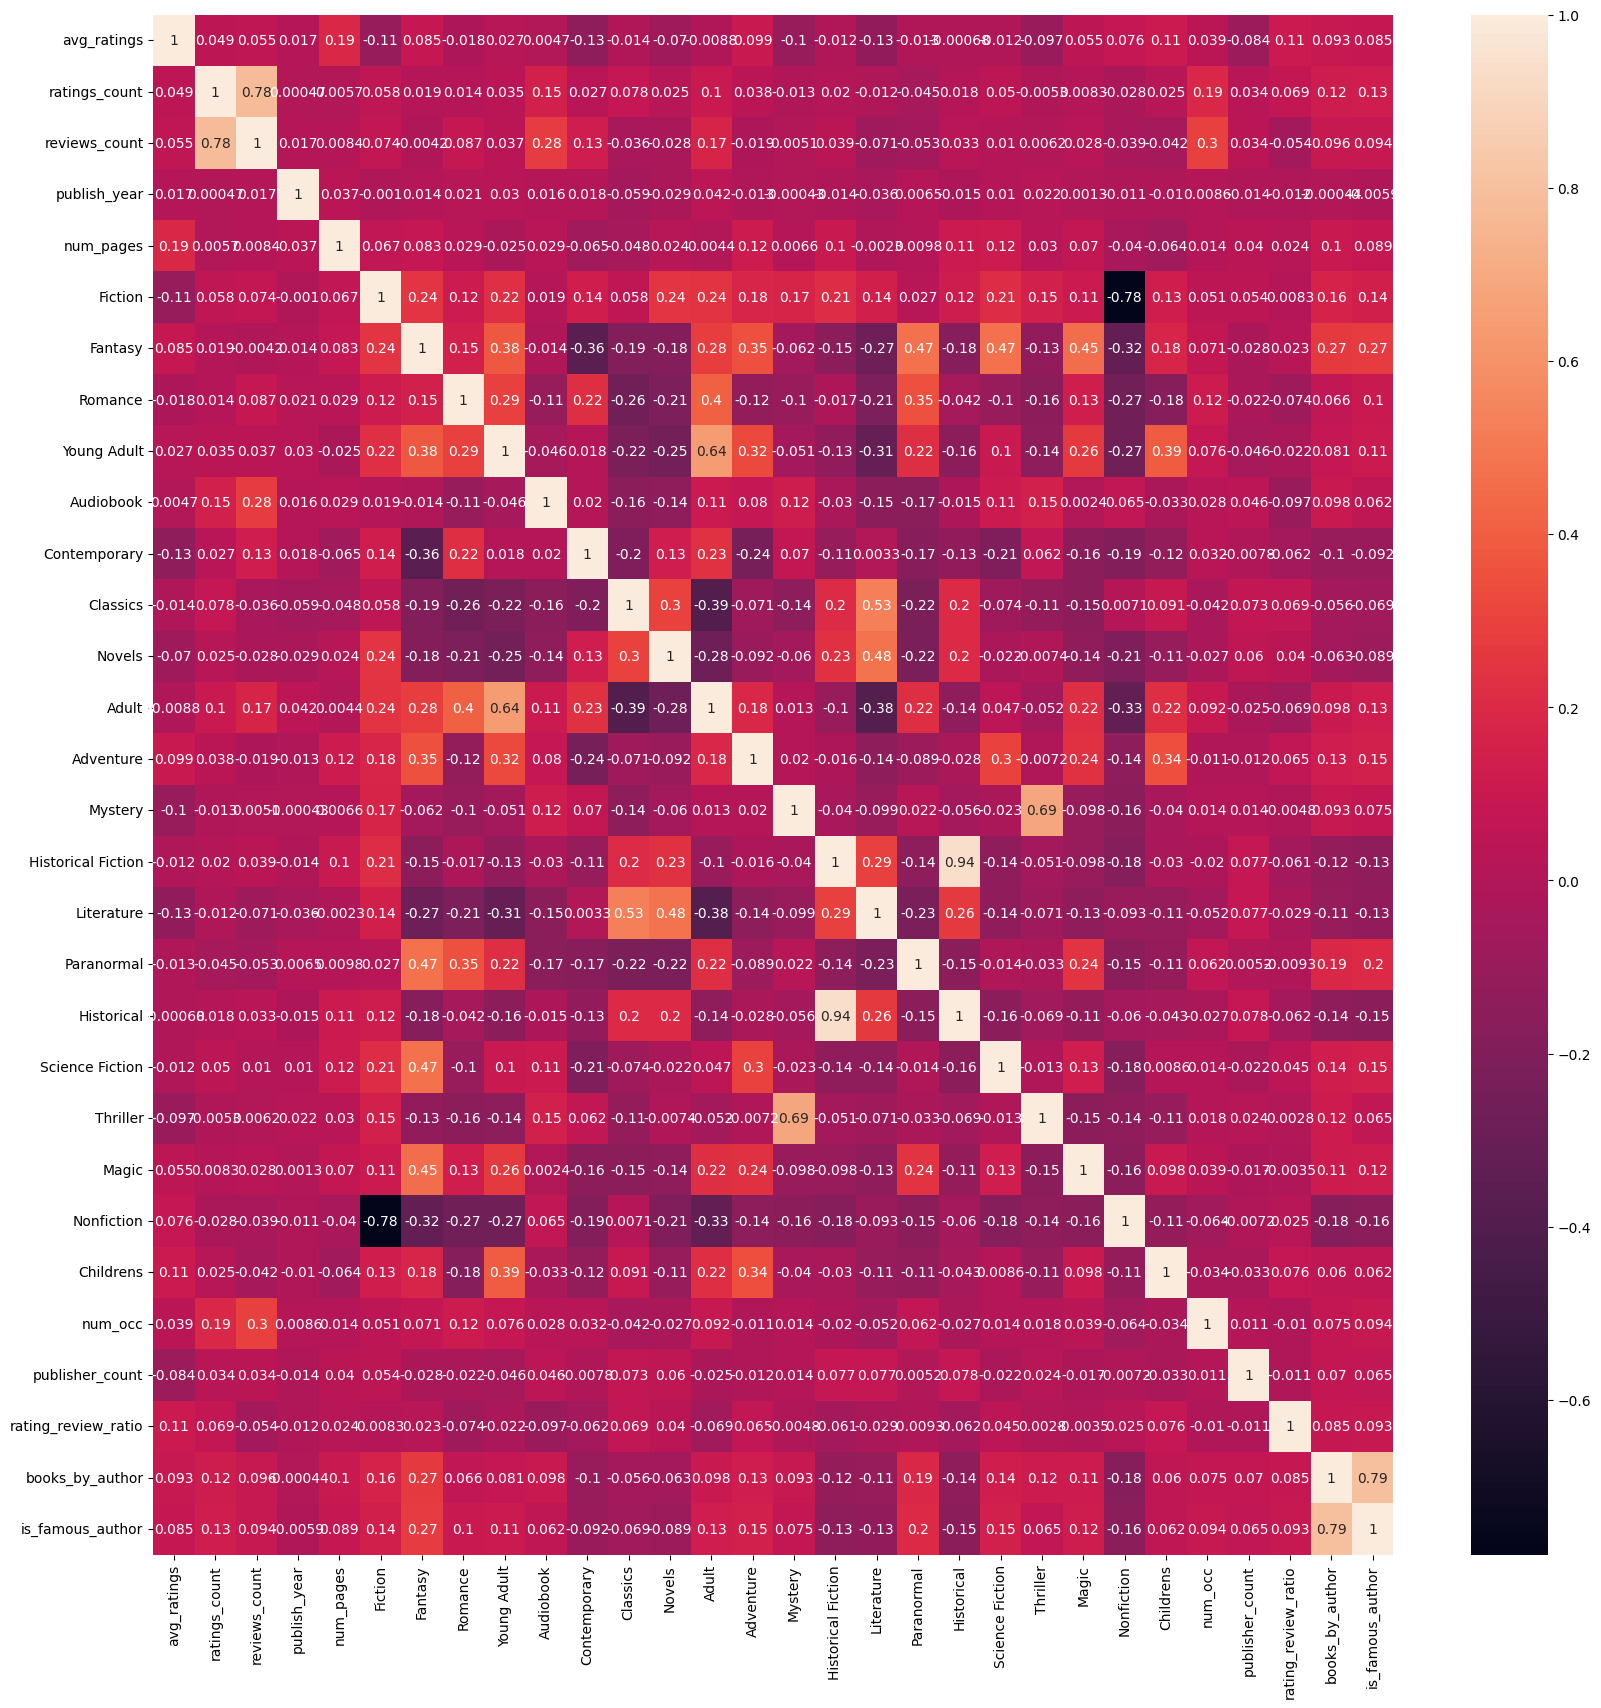

In [261]:
def plot_heatmap(data):
    # get correlation matrix
    corr = data.corr()
    plt.figure(figsize=(20, 20))

    # plot heatmap
    sns.heatmap(corr, annot=True)
    plt.show()

plot_heatmap(df)

In [262]:
corr = df.corr()
corr['avg_ratings'].sort_values(ascending=False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_22892\2622179258.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


avg_ratings            1.000000
num_pages              0.189746
rating_review_ratio    0.107154
Childrens              0.106649
Adventure              0.099285
books_by_author        0.092567
is_famous_author       0.084975
Fantasy                0.084915
Nonfiction             0.075999
reviews_count          0.055047
Magic                  0.054772
ratings_count          0.049241
num_occ                0.038964
Young Adult            0.027212
publish_year           0.016728
Audiobook              0.004666
Historical            -0.000681
Adult                 -0.008800
Science Fiction       -0.011818
Historical Fiction    -0.011913
Paranormal            -0.013279
Classics              -0.013534
Romance               -0.018231
Novels                -0.070358
publisher_count       -0.084187
Thriller              -0.097086
Mystery               -0.101863
Fiction               -0.109235
Literature            -0.128767
Contemporary          -0.134634
Name: avg_ratings, dtype: float64

In [263]:
top_16_corr = corr['avg_ratings'].sort_values(ascending=False)[:17]
top_16_corr.index

Index(['avg_ratings', 'num_pages', 'rating_review_ratio', 'Childrens',
       'Adventure', 'books_by_author', 'is_famous_author', 'Fantasy',
       'Nonfiction', 'reviews_count', 'Magic', 'ratings_count', 'num_occ',
       'Young Adult', 'publish_year', 'Audiobook', 'Historical'],
      dtype='object')

In [264]:
data = df.copy()
y = data['avg_ratings']
X = data.drop(['avg_ratings'], axis=1)

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [266]:
# cols = ['author', 'genres', 'page_format', 'publisher', 'language']
cols = ['page_format']
for col in cols:
    X_train, X_val, X_test = string_to_num(X_train, X_val, X_test, col)

X_train.head()

,ratings_count,reviews_count,publish_year,num_pages,page_format,Fiction,Fantasy,Romance,Young Adult,Audiobook,Contemporary,Classics,Novels,Adult,Adventure,Mystery,Historical Fiction,Literature,Paranormal,Historical,Science Fiction,Thriller,Magic,Nonfiction,Childrens,num_occ,publisher_count,rating_review_ratio,books_by_author,is_famous_author
7003,60584,5405,2015.0,336.0,24,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,64.0,11.208881,18,1
4062,42034,2156,2008.0,338.0,15,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,48.0,19.496289,1,0
4239,57237,2960,2002.0,151.0,15,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,2.0,19.336824,2,0
9463,12988,360,2010.0,352.0,8,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,154.0,36.077778,31,1
4142,87888,13586,2018.0,359.0,8,1,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,18.0,6.469012,1,0


In [267]:
cols = X_train.columns
for col in cols:
    print(f'{col}: {X_train[col].nunique()}')

ratings_count: 6089
reviews_count: 4233
publish_year: 81
num_pages: 899
page_format: 25
Fiction: 2
Fantasy: 2
Romance: 2
Young Adult: 2
Audiobook: 2
Contemporary: 2
Classics: 2
Novels: 2
Adult: 2
Adventure: 2
Mystery: 2
Historical Fiction: 2
Literature: 2
Paranormal: 2
Historical: 2
Science Fiction: 2
Thriller: 2
Magic: 2
Nonfiction: 2
Childrens: 2
num_occ: 5
publisher_count: 68
rating_review_ratio: 6327
books_by_author: 33
is_famous_author: 2


In [268]:
df.isnull().sum()

avg_ratings              0
ratings_count            0
reviews_count            0
publish_year            61
num_pages              124
page_format             44
Fiction                  0
Fantasy                  0
Romance                  0
Young Adult              0
Audiobook                0
Contemporary             0
Classics                 0
Novels                   0
Adult                    0
Adventure                0
Mystery                  0
Historical Fiction       0
Literature               0
Paranormal               0
Historical               0
Science Fiction          0
Thriller                 0
Magic                    0
Nonfiction               0
Childrens                0
num_occ                  0
publisher_count        372
rating_review_ratio      0
books_by_author          0
is_famous_author         0
dtype: int64

In [269]:
X_train, X_val, X_test = fillMissingData(X_train, X_val, X_test)
result = trainModel(X_train, y_train, X_val, y_val)
result

,MAE,RMSE,r2score
Random Forest,0.156607,0.203934,0.610361
SVR,0.209582,0.327429,-0.004420


In [270]:
cols = X_train.columns
cols

Index(['ratings_count', 'reviews_count', 'publish_year', 'num_pages',
       'page_format', 'Fiction', 'Fantasy', 'Romance', 'Young Adult',
       'Audiobook', 'Contemporary', 'Classics', 'Novels', 'Adult', 'Adventure',
       'Mystery', 'Historical Fiction', 'Literature', 'Paranormal',
       'Historical', 'Science Fiction', 'Thriller', 'Magic', 'Nonfiction',
       'Childrens', 'num_occ', 'publisher_count', 'rating_review_ratio',
       'books_by_author', 'is_famous_author'],
      dtype='object')

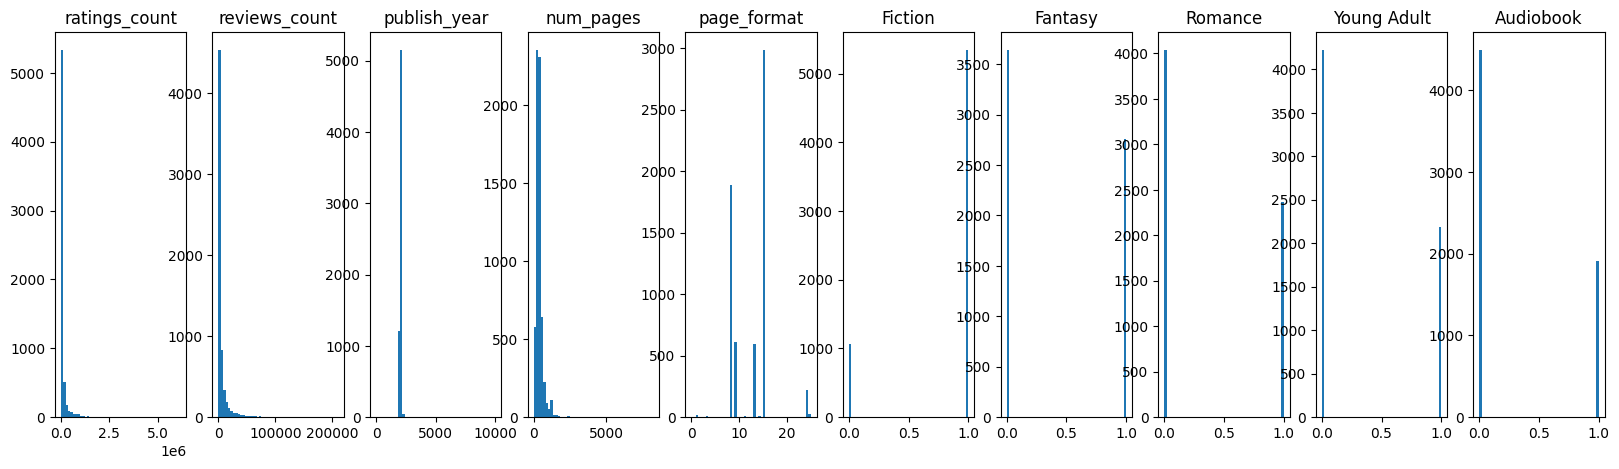

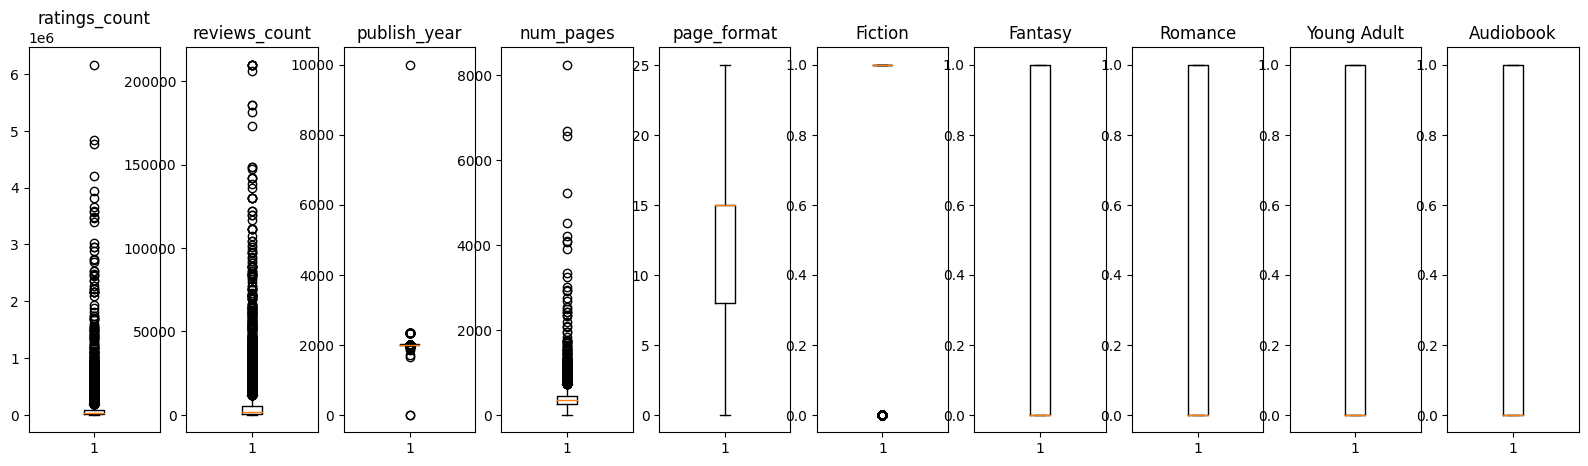

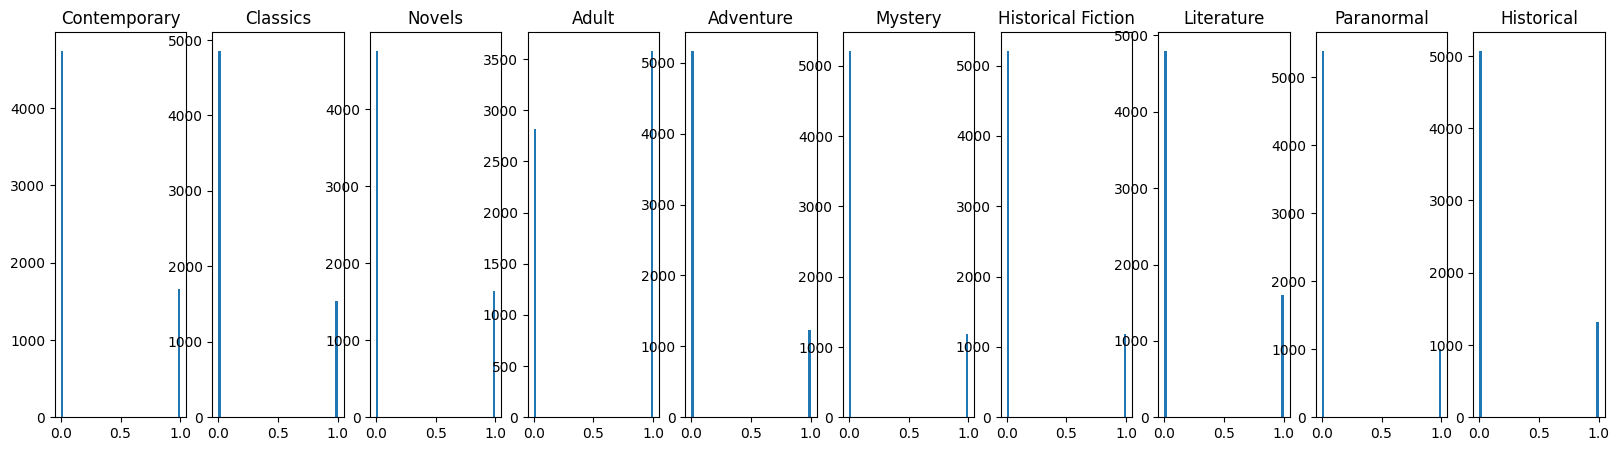

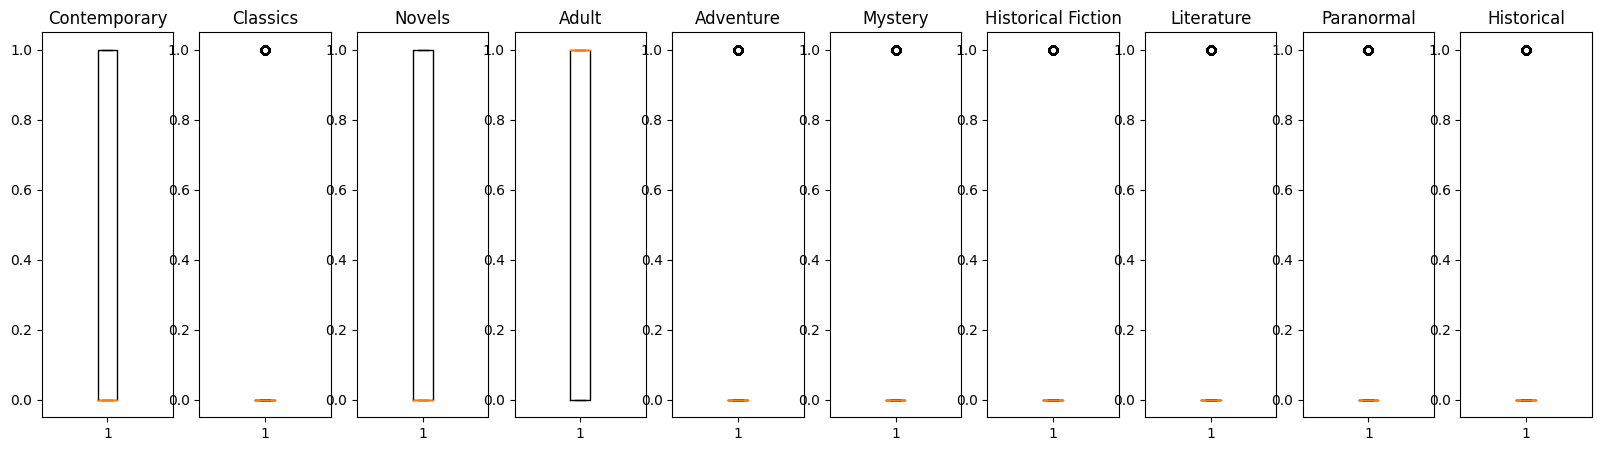

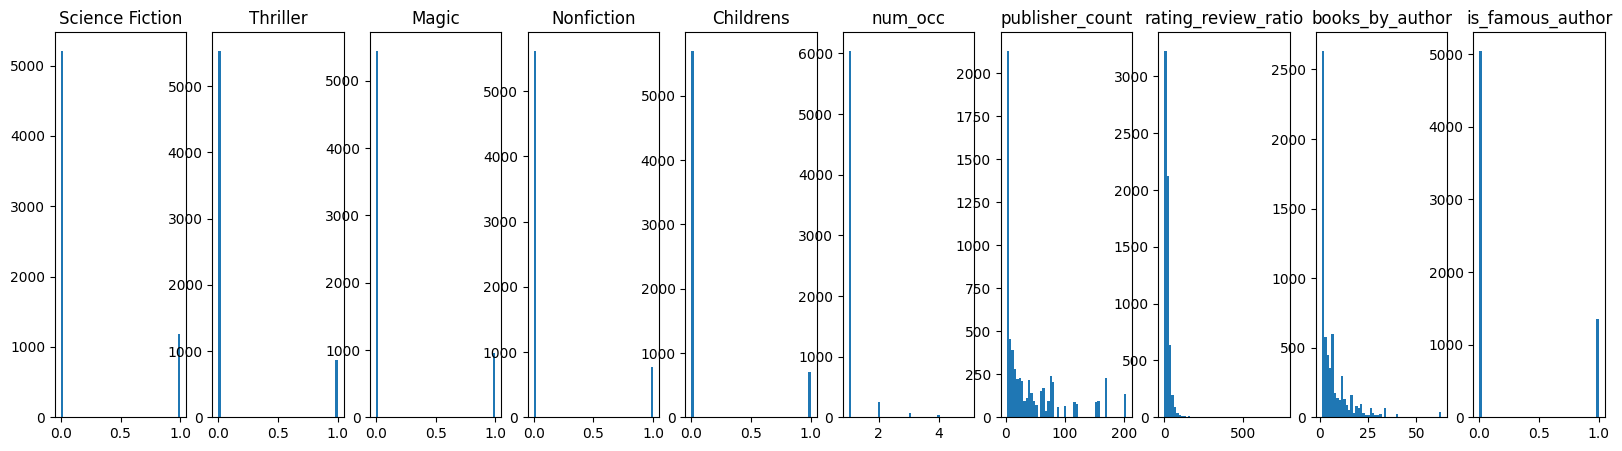

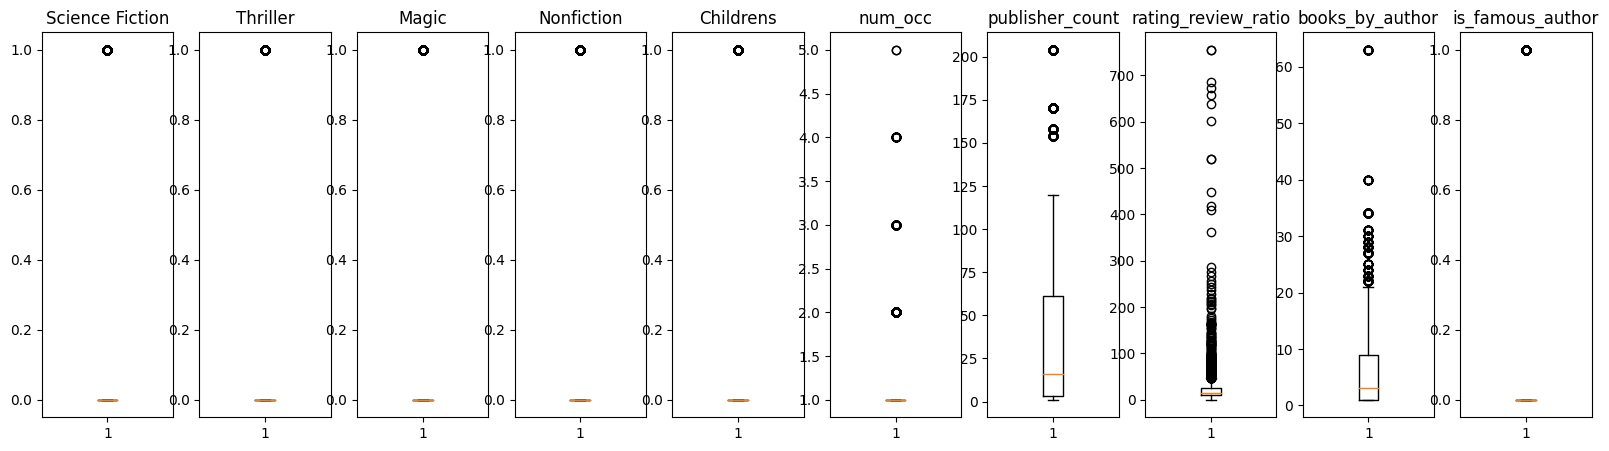

In [271]:
for i in range(0, 3):
    plotDistribution(X_train, cols[i*10: (i+1)*10])
    plotBox(X_train, cols[i*10: (i+1)*10])

In [272]:
X_train, X_val, X_test = handleOutlier(X_train, X_val, X_test)
result = trainModel(X_train, y_train, X_val, y_val)
result

,MAE,RMSE,r2score
Random Forest,0.162043,0.208051,0.594471
SVR,0.206864,0.327510,-0.004922


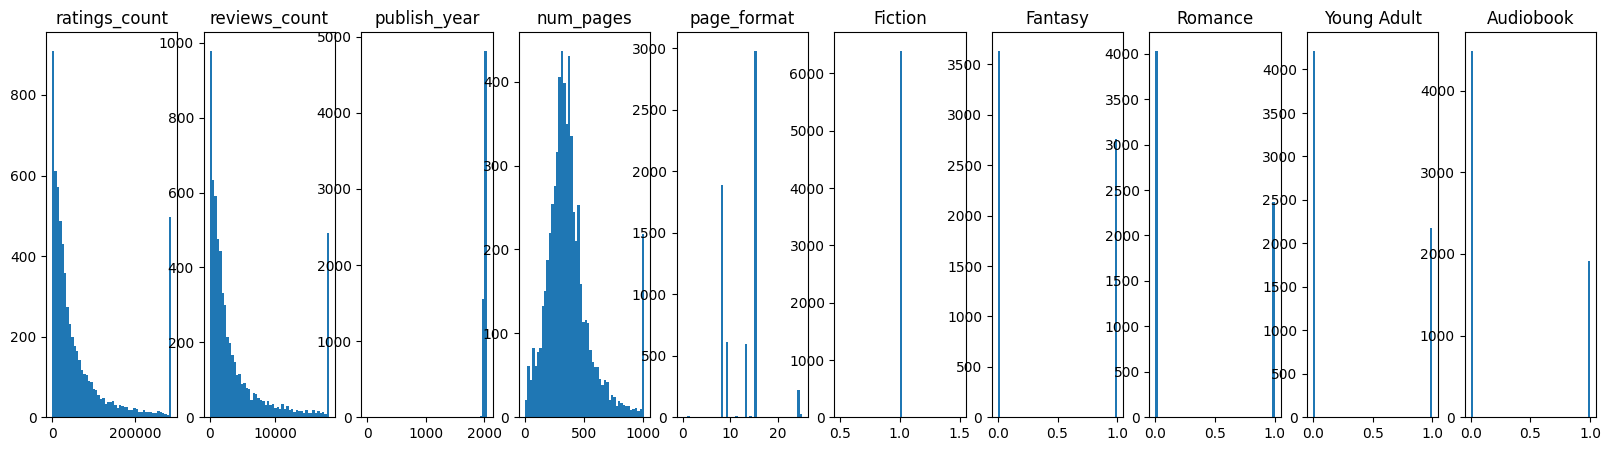

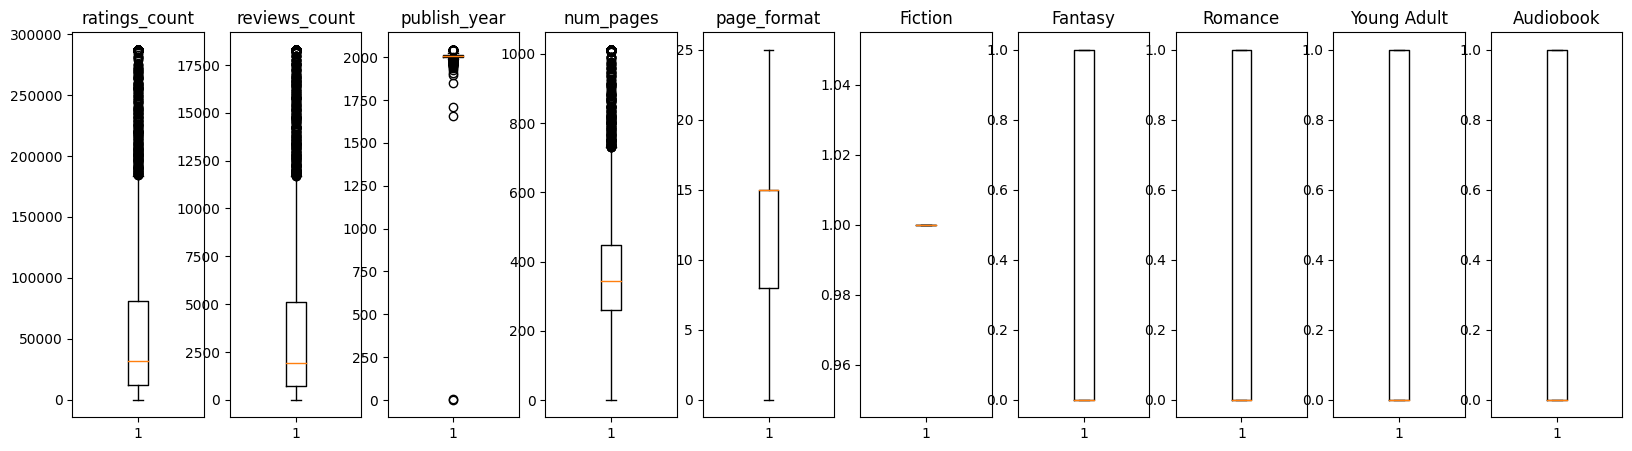

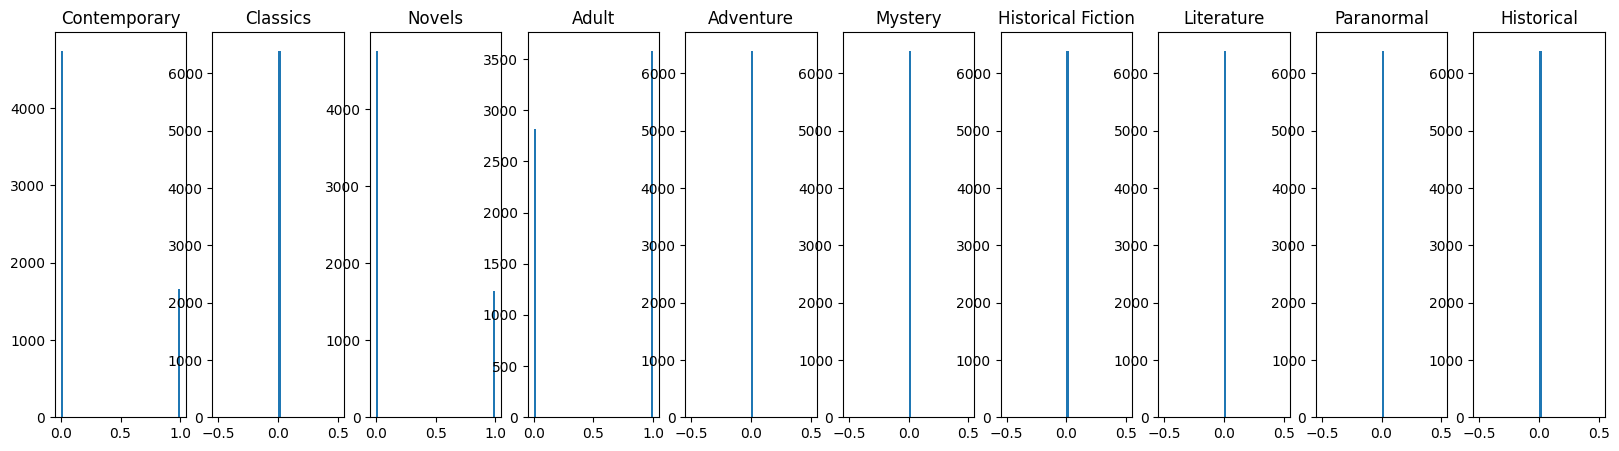

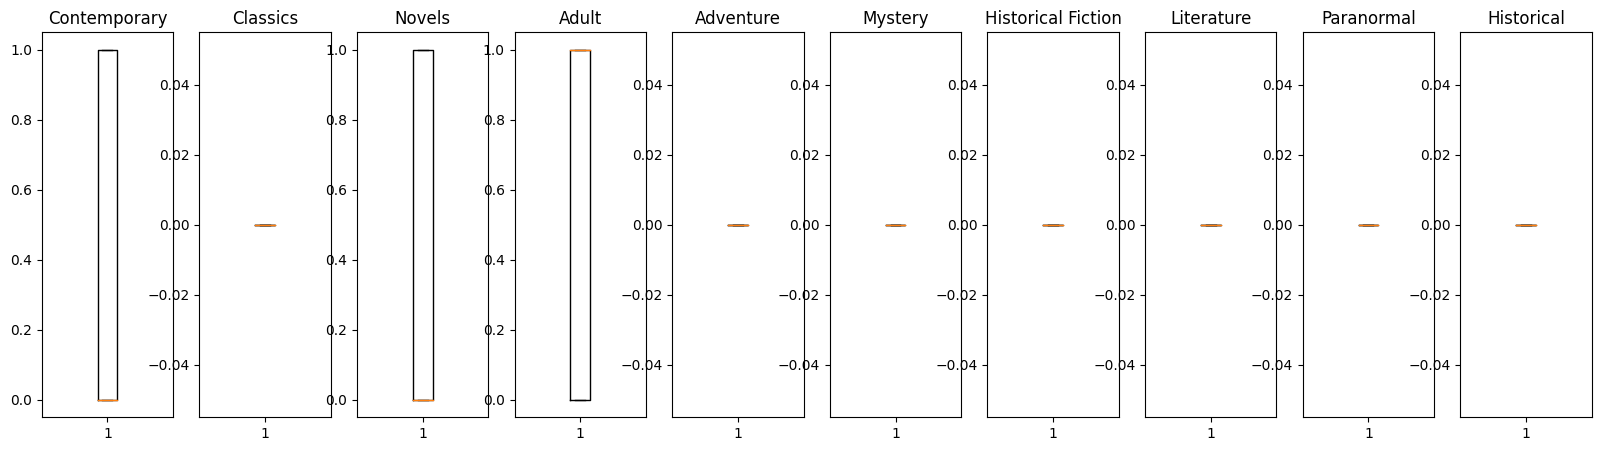

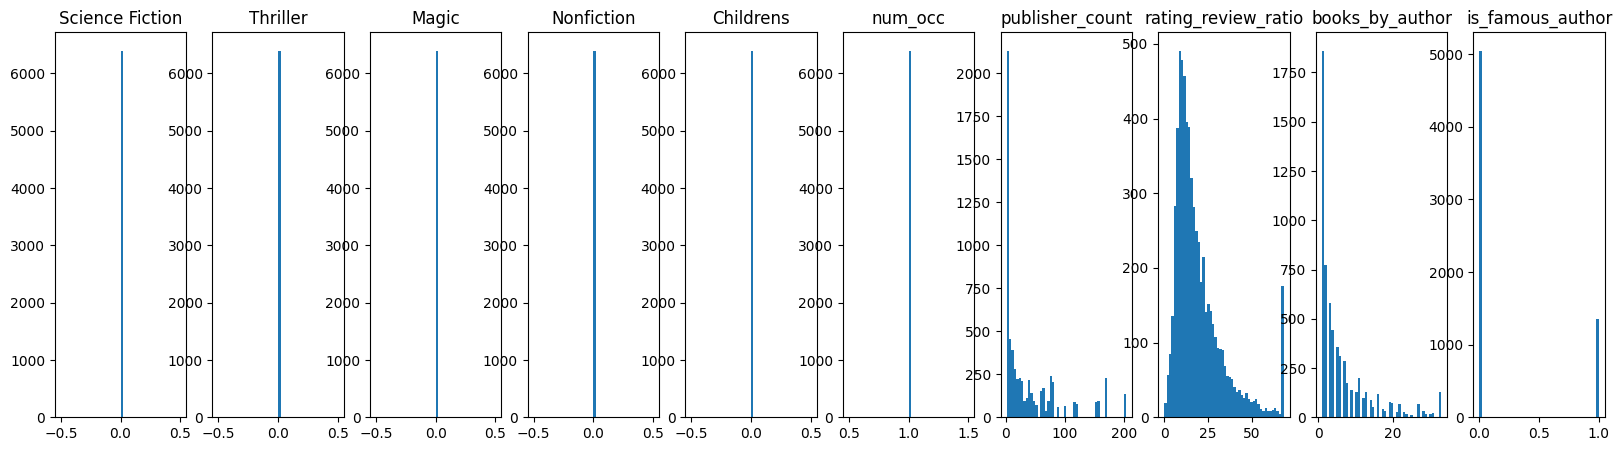

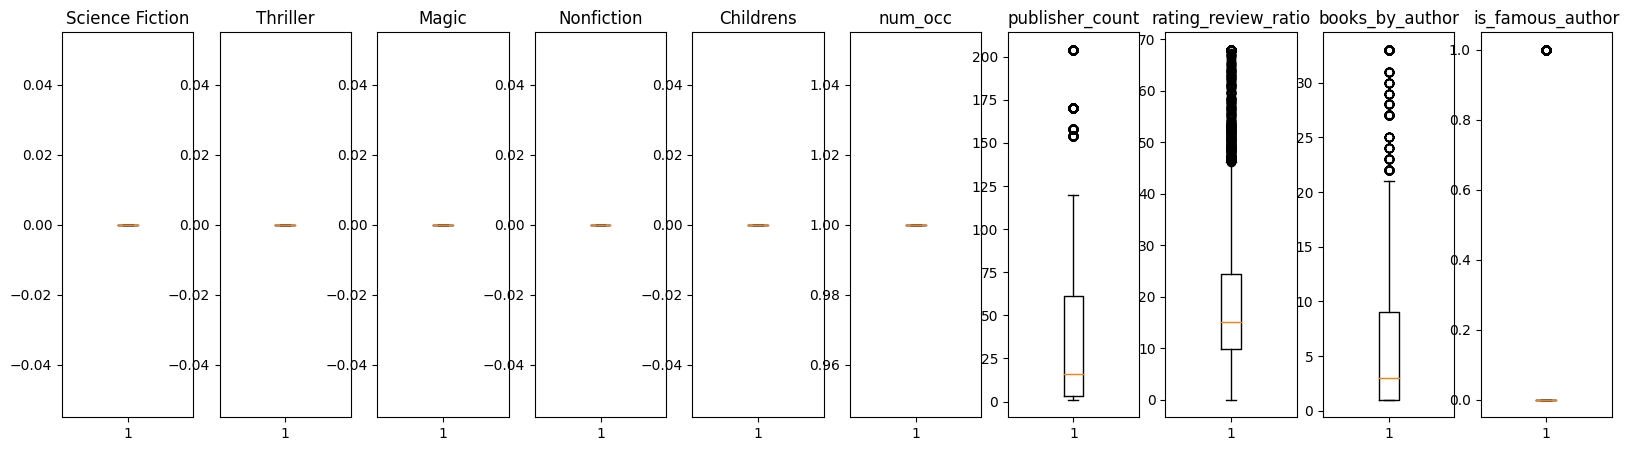

In [273]:
for i in range(0, 3):
    plotDistribution(X_train, cols[i*10: (i+1)*10])
    plotBox(X_train, cols[i*10: (i+1)*10])

In [274]:
for scaler in scalerArr:
    print(f'{scaler}:')
    X_train1, X_val1, X_test1 = scaleData(X_train.copy(), X_val.copy(), X_test.copy(), scaler)
    result = trainModel(X_train1, y_train, X_val1, y_val)
    print(result)
    print()

MinMaxScaler():
                    MAE      RMSE   r2score
Random Forest  0.163050  0.210368  0.585387
SVR            0.184887  0.304179  0.133157

MaxAbsScaler():
                    MAE      RMSE   r2score
Random Forest  0.162290  0.209940  0.587075
SVR            0.185202  0.305202  0.127313

StandardScaler():
                    MAE      RMSE   r2score
Random Forest  0.162795  0.210067  0.586575
SVR            0.179631  0.296745  0.175007

RobustScaler():
                    MAE      RMSE   r2score
Random Forest  0.162293  0.209361  0.589347
SVR            0.179327  0.296310  0.177427

Normalizer():
                    MAE      RMSE   r2score
Random Forest  0.171828  0.223473  0.532122
SVR            0.201132  0.325810  0.005487

QuantileTransformer():
                    MAE      RMSE   r2score
Random Forest  0.163191  0.210650  0.584275
SVR            0.178308  0.296972  0.173749

PowerTransformer():
                    MAE      RMSE   r2score
Random Forest  0.161435  0.208590  

In [275]:
X_train, X_val, X_test = scaleData(X_train, X_val, X_test, powerTransformer)
result = trainModel(X_train, y_train, X_val, y_val)
result

,MAE,RMSE,r2score
Random Forest,0.162574,0.209316,0.589525
SVR,0.175442,0.277343,0.279361


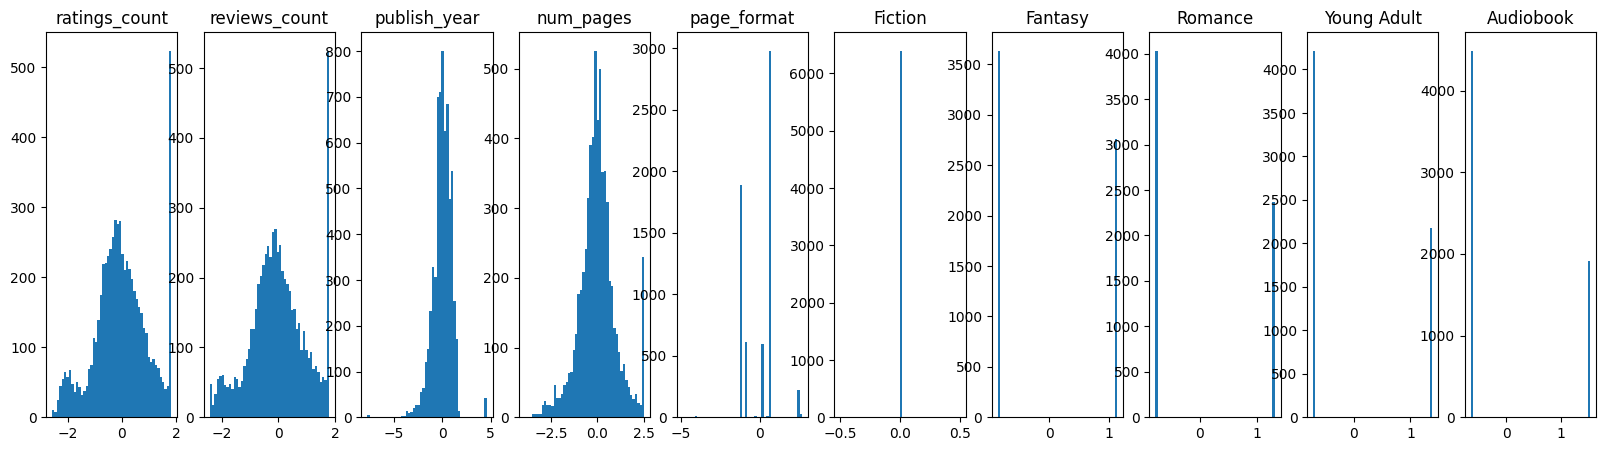

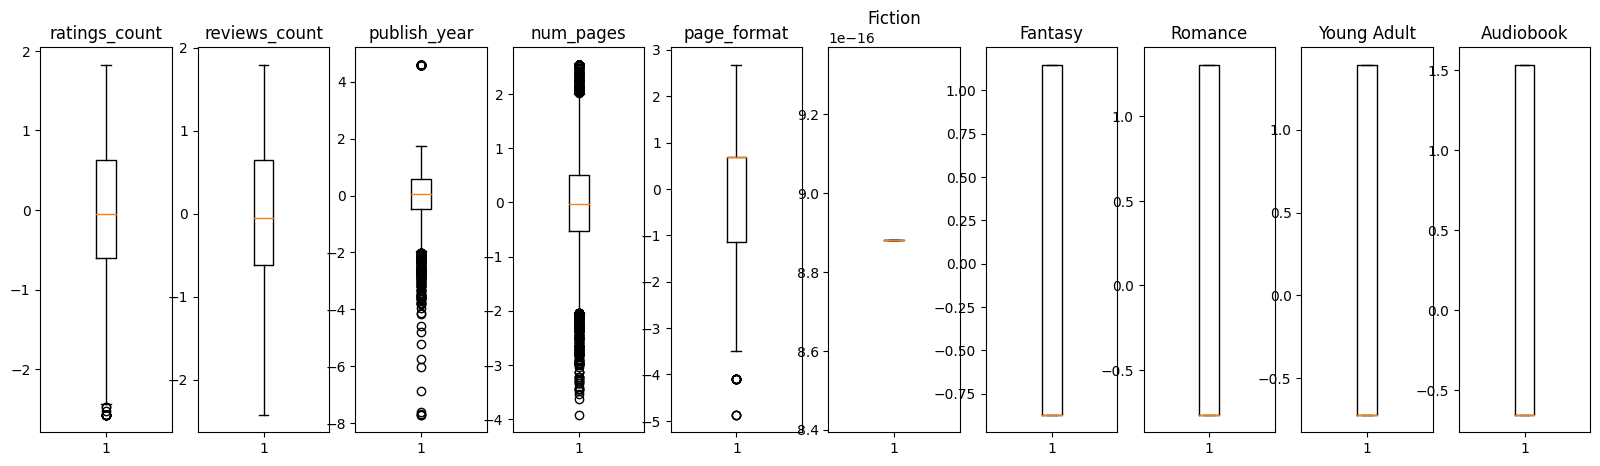

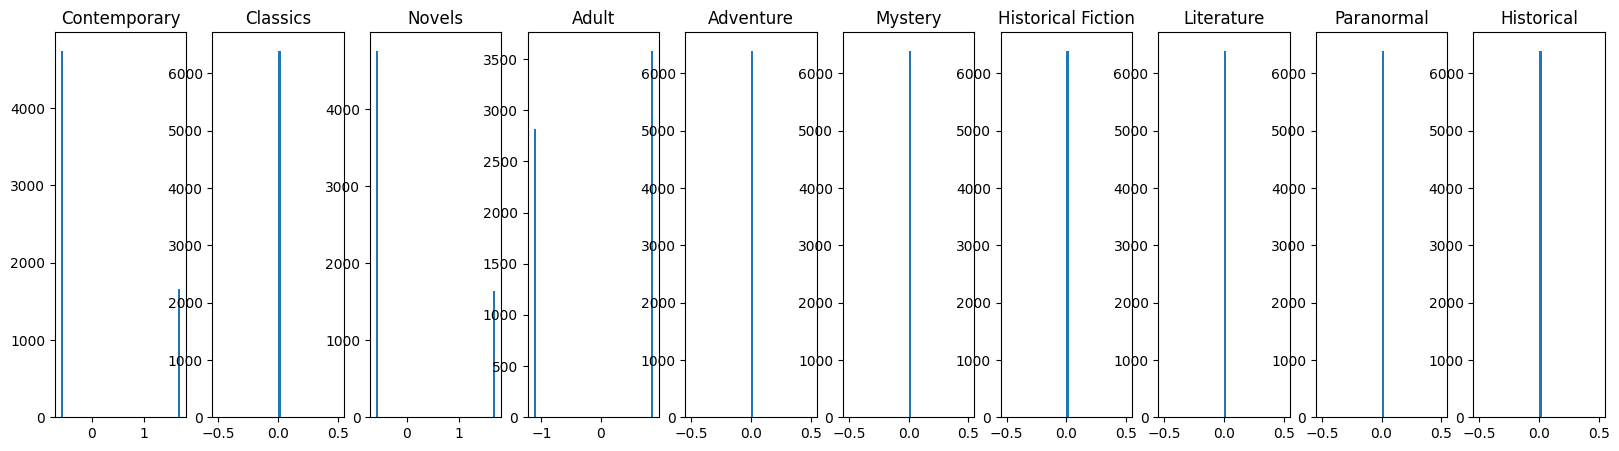

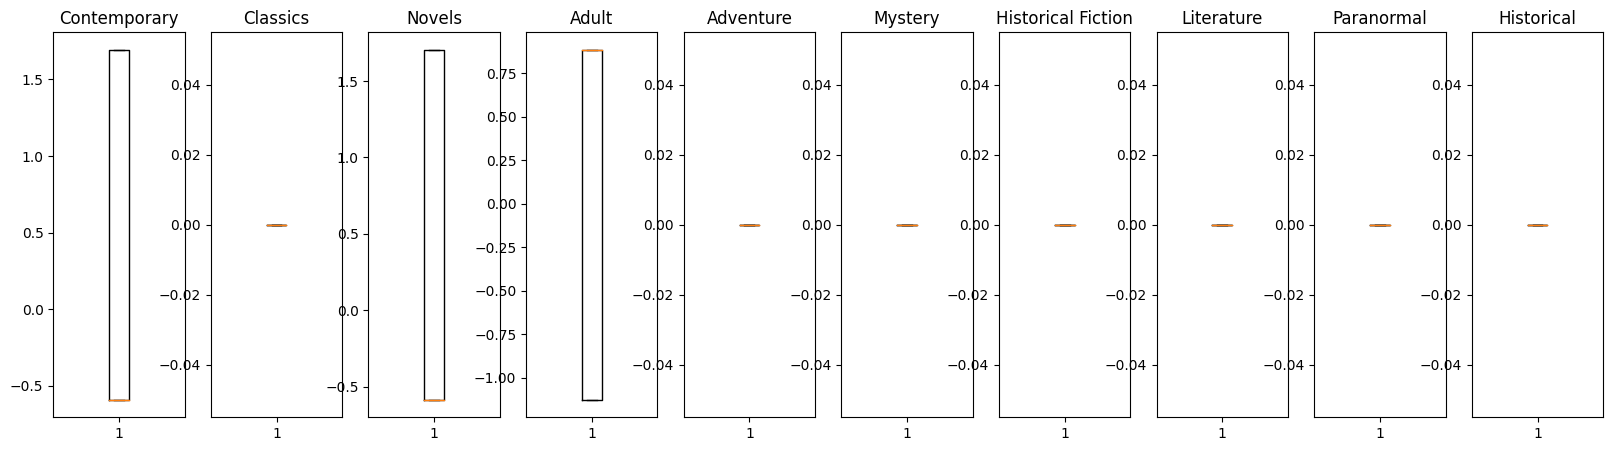

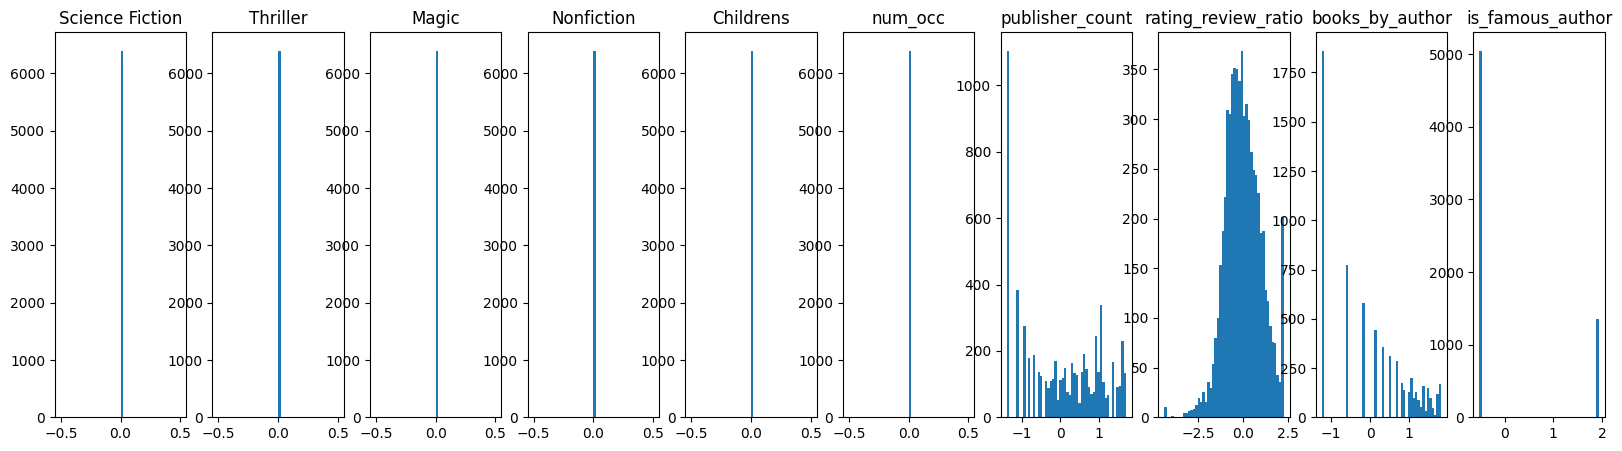

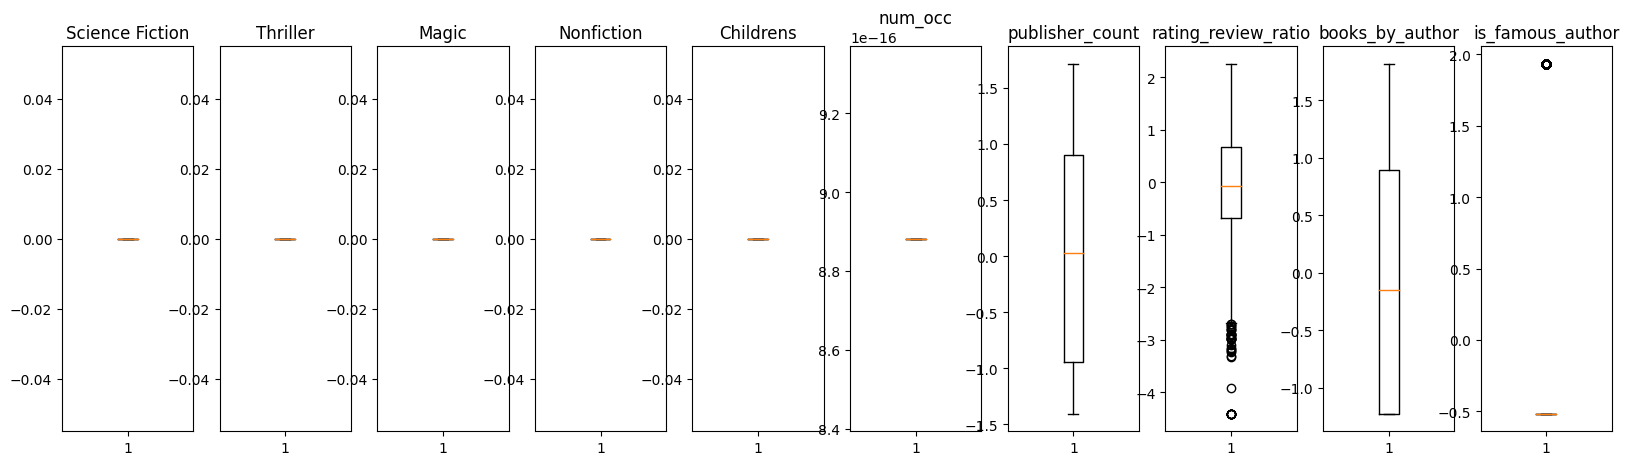

In [276]:
for i in range(0, 3):
    plotDistribution(X_train, cols[i*10: (i+1)*10])
    plotBox(X_train, cols[i*10: (i+1)*10])

In [278]:
features = ['ratings_count', 'reviews_count', 'publish_year', 'num_pages',
       'page_format', 'Fiction', 'Fantasy', 'Romance', 'Young Adult',
       'Audiobook', 'Contemporary', 'Classics', 'Novels', 'Adult', 'Adventure',
       'Mystery', 'Historical Fiction', 'Literature', 'Paranormal',
       'Historical', 'Science Fiction', 'Thriller', 'Magic', 'Nonfiction',
       'Childrens', 'num_occ', 'publisher_count', 'rating_review_ratio',
       'books_by_author', 'is_famous_author']
X_train1 = X_train[features]
X_val1 = X_val[features]
X_test1 = X_test[features]
# X_train_SF, X_val_SF, X_test_SF = selectFeatures(X_train, y_train, X_val, X_test)
result = trainModel(X_train1, y_train, X_val1, y_val)
result

,MAE,RMSE,r2score
Random Forest,0.162674,0.210318,0.585584
SVR,0.175442,0.277343,0.279361


In [279]:
X_train_SF, X_val_SF, X_test_SF = selectFeatures(X_train, y_train, X_val, X_test)
result = trainModel(X_train_SF, y_train, X_val_SF, y_val)
result

['ratings_count' 'reviews_count' 'publish_year' 'num_pages' 'page_format'
 'Fantasy' 'Romance' 'Young Adult' 'Audiobook' 'Contemporary' 'Novels'
 'Adult' 'publisher_count' 'rating_review_ratio' 'books_by_author'
 'is_famous_author']


,MAE,RMSE,r2score
Random Forest,0.161968,0.209461,0.588954
SVR,0.175442,0.277343,0.279361
